In [21]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import itertools
import csv
import sys
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
loc = ""
raw_data_1 = pd.read_csv(loc + 'season 2000-2001.csv')
raw_data_2 = pd.read_csv(loc + 'season 2001-2002.csv')
raw_data_3 = pd.read_csv(loc + 'season 2002-2003.csv')
raw_data_4 = pd.read_csv(loc + 'season 2003-2004.csv')
raw_data_5 = pd.read_csv(loc + 'season 2004-2005.csv')
raw_data_6 = pd.read_csv(loc + 'season 2005-2006.csv')
raw_data_7 = pd.read_csv(loc + 'season 2006-2007.csv')
raw_data_8 = pd.read_csv(loc + 'season 2007-2008.csv')
raw_data_9 = pd.read_csv(loc + 'season 2008-2009.csv')
raw_data_10 = pd.read_csv(loc + 'season 2009-2010.csv')
raw_data_11 = pd.read_csv(loc + 'season 2010-2011.csv')
raw_data_12 = pd.read_csv(loc + 'season 2011-2012.csv')
raw_data_13 = pd.read_csv(loc + 'season 2012-2013.csv')
raw_data_14 = pd.read_csv(loc + 'season 2013-2014.csv')
raw_data_15 = pd.read_csv(loc + 'season 2014-2015.csv')
raw_data_16 = pd.read_csv(loc + 'season 2015-2016.csv')
raw_data_17 = pd.read_csv(loc + 'season 2016-2017.csv')

In [4]:
columns_req = ['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTAG', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR' ,'AR']
playing_statistics_1 = raw_data_1[columns_req]                      
playing_statistics_2 = raw_data_2[columns_req]
playing_statistics_3 = raw_data_3[columns_req]
playing_statistics_4 = raw_data_4[columns_req]
playing_statistics_5 = raw_data_5[columns_req]
playing_statistics_6 = raw_data_6[columns_req]
playing_statistics_7 = raw_data_7[columns_req]
playing_statistics_8 = raw_data_8[columns_req]
playing_statistics_9 = raw_data_9[columns_req]
playing_statistics_10 = raw_data_10[columns_req]
playing_statistics_11 = raw_data_11[columns_req]   
playing_statistics_12 = raw_data_12[columns_req]
playing_statistics_13 = raw_data_13[columns_req]
playing_statistics_14 = raw_data_14[columns_req]
#playing_statistics_15 = raw_data_15[columns_req]
playing_statistics_16 = raw_data_16[columns_req]

def get_goals_scored(playing_stat):
    # Create a dictionary with team names as keys
    teams = {}
    for i in playing_stat.groupby('HomeTeam').mean().T.columns:
        teams[i] = []
    
    # the value corresponding to keys is a list containing the match location.
    for i in range(len(playing_stat)):
        HTGS = playing_stat.iloc[i]['FTHG']
        ATGS = playing_stat.iloc[i]['FTAG']
        teams[playing_stat.iloc[i].HomeTeam].append(HTGS)
        teams[playing_stat.iloc[i].AwayTeam].append(ATGS)
    
    # Create a dataframe for goals scored where rows are teams and cols are matchweek.
    GoalsScored = pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T
    GoalsScored[0] = 0
    # Aggregate to get uptil that point
    for i in range(2,39):
        GoalsScored[i] = GoalsScored[i] + GoalsScored[i-1]
    return GoalsScored



# Gets the goals conceded agg arranged by teams and matchweek
def get_goals_conceded(playing_stat):
    # Create a dictionary with team names as keys
    teams = {}
    for i in playing_stat.groupby('HomeTeam').mean().T.columns:
        teams[i] = []
    
    # the value corresponding to keys is a list containing the match location.
    for i in range(len(playing_stat)):
        ATGC = playing_stat.iloc[i]['FTHG']
        HTGC = playing_stat.iloc[i]['FTAG']
        teams[playing_stat.iloc[i].HomeTeam].append(HTGC)
        teams[playing_stat.iloc[i].AwayTeam].append(ATGC)
    
    # Create a dataframe for goals scored where rows are teams and cols are matchweek.
    GoalsConceded = pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T
    GoalsConceded[0] = 0
    # Aggregate to get uptil that point
    for i in range(2,39):
        GoalsConceded[i] = GoalsConceded[i] + GoalsConceded[i-1]
    return GoalsConceded

def get_gss(playing_stat):
    GC = get_goals_conceded(playing_stat)
    GS = get_goals_scored(playing_stat)
   
    j = 0
    HTGS = []
    ATGS = []
    HTGC = []
    ATGC = []

    for i in range(380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        HTGS.append(GS.loc[ht][j])
        ATGS.append(GS.loc[at][j])
        HTGC.append(GC.loc[ht][j])
        ATGC.append(GC.loc[at][j])
        
        if ((i + 1)% 10) == 0:
            j = j + 1
        
    playing_stat['HTGS'] = HTGS
    playing_stat['ATGS'] = ATGS
    playing_stat['HTGC'] = HTGC
    playing_stat['ATGC'] = ATGC
    
    return playing_stat


# Apply to each dataset
playing_statistics_1 = get_gss(playing_statistics_1)
playing_statistics_2 = get_gss(playing_statistics_2)
playing_statistics_3 = get_gss(playing_statistics_3)
playing_statistics_4 = get_gss(playing_statistics_4)
playing_statistics_5 = get_gss(playing_statistics_5)
playing_statistics_6 = get_gss(playing_statistics_6)
playing_statistics_7 = get_gss(playing_statistics_7)
playing_statistics_8 = get_gss(playing_statistics_8)
playing_statistics_9 = get_gss(playing_statistics_9)
playing_statistics_10 = get_gss(playing_statistics_10)
playing_statistics_11 = get_gss(playing_statistics_11)
playing_statistics_12 = get_gss(playing_statistics_12)
playing_statistics_13 = get_gss(playing_statistics_13)
playing_statistics_14 = get_gss(playing_statistics_14)
#playing_statistics_15 = get_gss(playing_statistics_15)
playing_statistics_16 = get_gss(playing_statistics_16)
playing_statistics_16


C:\Users\SOM\Anaconda3\lib\site-packages\ipykernel_launcher.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\SOM\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\SOM\Anaconda3\lib\site-packages\ipykernel_launcher.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTAG,HS,AS,HST,...,HF,AF,HY,AY,HR,AR,HTGS,ATGS,HTGC,ATGC
0,08/08/15,Bournemouth,Aston Villa,0,1,A,0,11,7,2,...,13,13,3,4,0,0,0,0,0,0
1,08/08/15,Chelsea,Swansea,2,2,D,1,11,18,3,...,15,16,1,3,1,0,0,0,0,0
2,08/08/15,Everton,Watford,2,2,D,1,10,11,5,...,7,13,1,2,0,0,0,0,0,0
3,08/08/15,Leicester,Sunderland,4,2,H,0,19,10,8,...,13,17,2,4,0,0,0,0,0,0
4,08/08/15,Man United,Tottenham,1,0,H,0,9,9,1,...,12,12,2,3,0,0,0,0,0,0
5,08/08/15,Norwich,Crystal Palace,1,3,A,1,17,11,6,...,14,20,1,0,0,0,0,0,0,0
6,09/08/15,Arsenal,West Ham,0,2,A,1,22,8,6,...,12,9,1,3,0,0,0,0,0,0
7,09/08/15,Newcastle,Southampton,2,2,D,1,9,15,4,...,9,12,2,4,0,0,0,0,0,0
8,09/08/15,Stoke,Liverpool,0,1,A,0,7,8,1,...,9,16,2,4,0,0,0,0,0,0
9,10/08/15,West Brom,Man City,0,3,A,2,9,19,2,...,12,9,4,1,0,0,0,0,0,0


In [4]:
playing_statistics_16.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTAG,HS,AS,HST,...,HF,AF,HY,AY,HR,AR,HTGS,ATGS,HTGC,ATGC
0,08/08/15,Bournemouth,Aston Villa,0,1,A,0,11,7,2,...,13,13,3,4,0,0,0,0,0,0
1,08/08/15,Chelsea,Swansea,2,2,D,1,11,18,3,...,15,16,1,3,1,0,0,0,0,0
2,08/08/15,Everton,Watford,2,2,D,1,10,11,5,...,7,13,1,2,0,0,0,0,0,0
3,08/08/15,Leicester,Sunderland,4,2,H,0,19,10,8,...,13,17,2,4,0,0,0,0,0,0
4,08/08/15,Man United,Tottenham,1,0,H,0,9,9,1,...,12,12,2,3,0,0,0,0,0,0


In [5]:
def get_points(result):
    if result == 'W':
        return 3
    elif result == 'D':
        return 1
    else:
        return 0
    

def get_cuml_points(matchres):
    matchres_points = matchres.applymap(get_points)
    for i in range(2,39):
        matchres_points[i] = matchres_points[i] + matchres_points[i-1]
        
    matchres_points.insert(column =0, loc = 0, value = [0*i for i in range(20)])
    return matchres_points


def get_matchres(playing_stat):
    # Create a dictionary with team names as keys
    teams = {}
    for i in playing_stat.groupby('HomeTeam').mean().T.columns:
        teams[i] = []

    # the value corresponding to keys is a list containing the match result
    for i in range(len(playing_stat)):
        if playing_stat.iloc[i].FTR == 'H':
            teams[playing_stat.iloc[i].HomeTeam].append('W')
            teams[playing_stat.iloc[i].AwayTeam].append('L')
        elif playing_stat.iloc[i].FTR == 'A':
            teams[playing_stat.iloc[i].AwayTeam].append('W')
            teams[playing_stat.iloc[i].HomeTeam].append('L')
        else:
            teams[playing_stat.iloc[i].AwayTeam].append('D')
            teams[playing_stat.iloc[i].HomeTeam].append('D')
            
    return pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T

def get_agg_points(playing_stat):
    matchres = get_matchres(playing_stat)
    cum_pts = get_cuml_points(matchres)
    HTP = []
    ATP = []
    j = 0
    for i in range(380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        HTP.append(cum_pts.loc[ht][j])
        ATP.append(cum_pts.loc[at][j])

        if ((i + 1)% 10) == 0:
            j = j + 1
            
    playing_stat['HTP'] = HTP
    playing_stat['ATP'] = ATP
    return playing_stat
    
# Apply to each dataset
playing_statistics_1 = get_agg_points(playing_statistics_1)
playing_statistics_2 = get_agg_points(playing_statistics_2)
playing_statistics_3 = get_agg_points(playing_statistics_3)
playing_statistics_4 = get_agg_points(playing_statistics_4)
playing_statistics_5 = get_agg_points(playing_statistics_5)
playing_statistics_6 = get_agg_points(playing_statistics_6)
playing_statistics_7 = get_agg_points(playing_statistics_7)
playing_statistics_8 = get_agg_points(playing_statistics_8)
playing_statistics_9 = get_agg_points(playing_statistics_9)
playing_statistics_10 = get_agg_points(playing_statistics_10)
playing_statistics_11 = get_agg_points(playing_statistics_11)
playing_statistics_12 = get_agg_points(playing_statistics_12)
playing_statistics_13 = get_agg_points(playing_statistics_13)
playing_statistics_14 = get_agg_points(playing_statistics_14)
#playing_statistics_15 = get_agg_points(playing_statistics_15)
playing_statistics_16 = get_agg_points(playing_statistics_16)


C:\Users\welcome\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\welcome\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
def get_form(playing_stat,num):
    form = get_matchres(playing_stat)
    form_final = form.copy()
    for i in range(num,39):
        form_final[i] = ''
        j = 0
        while j < num:
            form_final[i] += form[i-j]
            j += 1           
    return form_final

def add_form(playing_stat,num):
    form = get_form(playing_stat,num)
    h = ['M' for i in range(num * 10)]  # since form is not available for n MW (n*10)
    a = ['M' for i in range(num * 10)]
    
    j = num
    for i in range((num*10),380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        
        past = form.loc[ht][j]               # get past n results
        h.append(past[num-1])                    # 0 index is most recent
        
        past = form.loc[at][j]               # get past n results.
        a.append(past[num-1])                   # 0 index is most recent
        
        if ((i + 1)% 10) == 0:
            j = j + 1

    playing_stat['HM' + str(num)] = h                 
    playing_stat['AM' + str(num)] = a

    
    return playing_stat


def add_form_df(playing_statistics):
    playing_statistics = add_form(playing_statistics,1)
    playing_statistics = add_form(playing_statistics,2)
    playing_statistics = add_form(playing_statistics,3)
    playing_statistics = add_form(playing_statistics,4)
    playing_statistics = add_form(playing_statistics,5)
    return playing_statistics    
    
# Make changes to df
playing_statistics_1 = add_form_df(playing_statistics_1)
playing_statistics_2 = add_form_df(playing_statistics_2)
playing_statistics_3 = add_form_df(playing_statistics_3)
playing_statistics_4 = add_form_df(playing_statistics_4)
playing_statistics_5 = add_form_df(playing_statistics_5)
playing_statistics_6 = add_form_df(playing_statistics_6)
playing_statistics_7 = add_form_df(playing_statistics_7)
playing_statistics_8 = add_form_df(playing_statistics_8)
playing_statistics_9 = add_form_df(playing_statistics_9)
playing_statistics_10 = add_form_df(playing_statistics_10)
playing_statistics_11 = add_form_df(playing_statistics_11)
playing_statistics_12 = add_form_df(playing_statistics_12)
playing_statistics_13 = add_form_df(playing_statistics_13)
playing_statistics_14 = add_form_df(playing_statistics_14)
#playing_statistics_15 = add_form_df(playing_statistics_15)    
playing_statistics_16 = add_form_df(playing_statistics_16)


C:\Users\welcome\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\welcome\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
playing_statistics_16.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTAG,HS,AS,HST,...,HM1,AM1,HM2,AM2,HM3,AM3,HM4,AM4,HM5,AM5
0,08/08/15,Bournemouth,Aston Villa,0,1,A,0,11,7,2,...,M,M,M,M,M,M,M,M,M,M
1,08/08/15,Chelsea,Swansea,2,2,D,1,11,18,3,...,M,M,M,M,M,M,M,M,M,M
2,08/08/15,Everton,Watford,2,2,D,1,10,11,5,...,M,M,M,M,M,M,M,M,M,M
3,08/08/15,Leicester,Sunderland,4,2,H,0,19,10,8,...,M,M,M,M,M,M,M,M,M,M
4,08/08/15,Man United,Tottenham,1,0,H,0,9,9,1,...,M,M,M,M,M,M,M,M,M,M


In [8]:
playing_stat = pd.concat([raw_data_3,raw_data_4,raw_data_5,raw_data_6,raw_data_7,raw_data_8,raw_data_9,raw_data_10,raw_data_11,raw_data_12,raw_data_13,raw_data_14,raw_data_15,raw_data_16,raw_data_17],ignore_index=True)

C:\Users\welcome\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [9]:
def get_mw(playing_stat):
    j = 1
    MatchWeek = []
    for i in range(380):
        MatchWeek.append(j)
        if ((i + 1)% 10) == 0:
            j = j + 1
    playing_stat['MW'] = MatchWeek
    return playing_stat

playing_statistics_1 = get_mw(playing_statistics_1)
playing_statistics_2 = get_mw(playing_statistics_2)
playing_statistics_3 = get_mw(playing_statistics_3)
playing_statistics_4 = get_mw(playing_statistics_4)
playing_statistics_5 = get_mw(playing_statistics_5)
playing_statistics_6 = get_mw(playing_statistics_6)
playing_statistics_7 = get_mw(playing_statistics_7)
playing_statistics_8 = get_mw(playing_statistics_8)
playing_statistics_9 = get_mw(playing_statistics_9)
playing_statistics_10 = get_mw(playing_statistics_10)
playing_statistics_11 = get_mw(playing_statistics_11)
playing_statistics_12 = get_mw(playing_statistics_12)
playing_statistics_13 = get_mw(playing_statistics_13)
playing_statistics_14 = get_mw(playing_statistics_14)
#playing_statistics_15 = get_mw(playing_statistics_15)
playing_statistics_16 = get_mw(playing_statistics_16)
playing_statistics_1.head()

C:\Users\welcome\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTAG,HS,AS,HST,...,AM1,HM2,AM2,HM3,AM3,HM4,AM4,HM5,AM5,MW
0,19/08/00,Charlton,Man City,4,0,H,0,17,8,14,...,M,M,M,M,M,M,M,M,M,1
1,19/08/00,Chelsea,West Ham,4,2,H,0,17,12,10,...,M,M,M,M,M,M,M,M,M,1
2,19/08/00,Coventry,Middlesbrough,1,3,A,1,6,16,3,...,M,M,M,M,M,M,M,M,M,1
3,19/08/00,Derby,Southampton,2,2,D,2,6,13,4,...,M,M,M,M,M,M,M,M,M,1
4,19/08/00,Leeds,Everton,2,0,H,0,17,12,8,...,M,M,M,M,M,M,M,M,M,1


In [10]:
playing_stat = pd.concat([playing_statistics_1,
                          playing_statistics_2,
                          playing_statistics_3,
                          playing_statistics_4,
                          playing_statistics_5,
                          playing_statistics_6,
                          playing_statistics_7,
                          playing_statistics_8,
                          playing_statistics_9,
                          playing_statistics_10,
                          playing_statistics_11,
                          playing_statistics_12,
                          playing_statistics_13,
                          playing_statistics_14,
#                          playing_statistics_15,
                          playing_statistics_16], ignore_index=True)
def get_form_points(string):
    sum = 0
    for letter in string:
        sum += get_points(letter)
    return sum

playing_stat['HTFormPtsStr'] = playing_stat['HM1'] + playing_stat['HM2'] + playing_stat['HM3'] + playing_stat['HM4'] + playing_stat['HM5']
playing_stat['ATFormPtsStr'] = playing_stat['AM1'] + playing_stat['AM2'] + playing_stat['AM3'] + playing_stat['AM4'] + playing_stat['AM5']

playing_stat['HTFormPts'] = playing_stat['HTFormPtsStr'].apply(get_form_points)
playing_stat['ATFormPts'] = playing_stat['ATFormPtsStr'].apply(get_form_points)



playing_stat.tail()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTAG,HS,AS,HST,...,AM3,HM4,AM4,HM5,AM5,MW,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts
5695,15/05/16,Stoke,West Ham,2,1,H,1,7,20,4,...,W,L,W,L,D,38,LDLLL,WLWWD,1,10
5696,15/05/16,Swansea,Man City,1,1,D,1,4,18,1,...,W,L,D,W,W,38,WWLLW,DLWDW,9,8
5697,15/05/16,Watford,Sunderland,2,2,D,1,21,6,6,...,D,L,D,W,W,38,LLWLW,WWDDW,6,11
5698,15/05/16,West Brom,Liverpool,1,1,D,1,13,7,1,...,L,L,D,L,W,38,DLDLL,DWLDW,2,8
5699,17/05/16,Man United,Bournemouth,3,1,H,0,12,7,5,...,L,W,L,W,W,38,LWDWW,DLLLW,10,4


In [11]:
playing_stat['HTGD'] = playing_stat['HTGS'] - playing_stat['HTGC']
playing_stat['ATGD'] = playing_stat['ATGS'] - playing_stat['ATGC']

# Diff in points
playing_stat['DiffPts'] = playing_stat['HTP'] - playing_stat['ATP']
playing_stat['DiffFormPts'] = playing_stat['HTFormPts'] - playing_stat['ATFormPts']



In [12]:
playing_stat[['HomeTeam','AwayTeam','HTGD','ATGD','DiffPts','DiffFormPts','HTP','ATP','FTR', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR' ,'AR' ]].head()

,HomeTeam,AwayTeam,HTGD,ATGD,DiffPts,DiffFormPts,HTP,ATP,FTR,HS,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,Charlton,Man City,0,0,0,0,0,0,H,17,...,14,4,6,6,13,12,1,2,0,0
1,Chelsea,West Ham,0,0,0,0,0,0,H,17,...,10,5,7,7,19,14,1,2,0,0
2,Coventry,Middlesbrough,0,0,0,0,0,0,A,6,...,3,9,8,4,15,21,5,3,1,0
3,Derby,Southampton,0,0,0,0,0,0,D,6,...,4,6,5,8,11,13,1,1,0,0
4,Leeds,Everton,0,0,0,0,0,0,H,17,...,8,6,6,4,21,20,1,3,0,0


C:\Users\welcome\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001948831E4A8>,
      dtype=object)

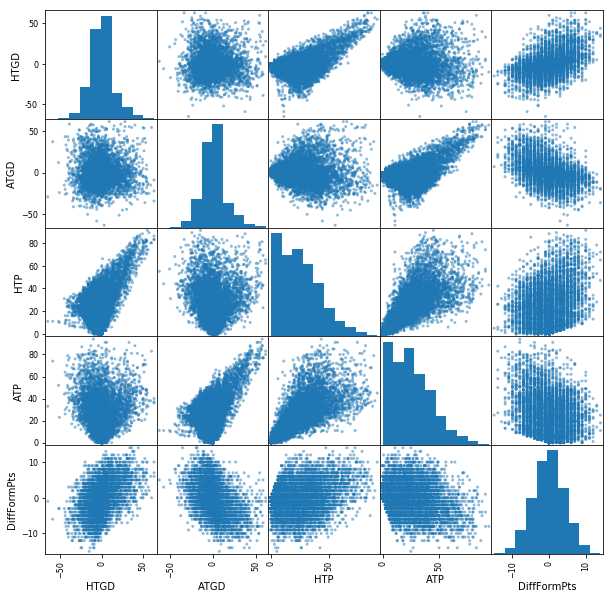

In [13]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(playing_stat[['HTGD','ATGD','HTP','ATP','DiffFormPts']], figsize=(10,10))

In [14]:
playing_stat.to_csv("Siraj Merged_dataset.csv")

In [8]:
df = pd.read_csv("Siraj Merged_dataset.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)
list(df)

['Date',
 'HomeTeam',
 'AwayTeam',
 'FTHG',
 'FTAG',
 'FTR',
 'HTAG',
 'HS',
 'AS',
 'HST',
 'AST',
 'HC',
 'AC',
 'HF',
 'AF',
 'HY',
 'AY',
 'HR',
 'AR',
 'HTGS',
 'ATGS',
 'HTGC',
 'ATGC',
 'HTP',
 'ATP',
 'HM1',
 'AM1',
 'HM2',
 'AM2',
 'HM3',
 'AM3',
 'HM4',
 'AM4',
 'HM5',
 'AM5',
 'MW',
 'HTFormPtsStr',
 'ATFormPtsStr',
 'HTFormPts',
 'ATFormPts',
 'HTGD',
 'ATGD',
 'DiffPts',
 'DiffFormPts']

In [11]:
table = pd.DataFrame(columns=('Team','HGS','AGS','HAS','AAS','HGC','AGC','HDS','ADS','MP'))

avg_home_scored = df.FTHG.sum() / 6080.0
avg_away_scored = df.FTAG.sum() / 6080.0
avg_home_conceded = avg_away_scored
avg_away_conceded = avg_home_scored
print(avg_away_conceded)
table

1.4307565789473684


,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS,MP


In [12]:
res_home = df.groupby('HomeTeam')
res_away = df.groupby('AwayTeam')


In [13]:
table.Team = res_home.HomeTeam.min().values
table.HGS = res_home.FTHG.sum().values
table.HGC = res_home.FTAG.sum().values
table.AGS = res_away.FTAG.sum().values
table.AGC = res_away.FTHG.sum().values
table.MP = res_home.HomeTeam.count().values
#19 Home matches for each team each season and 16 seasons therefore 304 home matches and 304 away matches
table.HAS = (table.HGS / table.MP)
table.AAS = (table.AGS / table.MP)
table.HDS = (table.HGC / table.MP)
table.ADS = (table.AGC / table.MP)

table

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS,MP
0,Arsenal,621,473,2.178947,1.659649,239,320,0.838596,1.122807,285
1,Aston Villa,359,328,1.259649,1.150877,316,469,1.108772,1.645614,285
2,Birmingham,162,111,1.218045,0.834586,140,220,1.052632,1.654135,133
3,Blackburn,289,229,1.382775,1.095694,239,353,1.143541,1.688995,209
4,Blackpool,30,25,1.578947,1.315789,37,41,1.947368,2.157895,19
5,Bolton,278,217,1.330144,1.038278,260,353,1.244019,1.688995,209
6,Bournemouth,23,22,1.210526,1.157895,34,33,1.789474,1.736842,19
7,Bradford,20,10,1.052632,0.526316,29,41,1.526316,2.157895,19
8,Burnley,25,17,1.315789,0.894737,30,52,1.578947,2.736842,19
9,Cardiff,20,12,1.052632,0.631579,35,39,1.842105,2.052632,19


In [14]:
df.dropna(how='any',axis=0,inplace=True)
list(df)

['Date',
 'HomeTeam',
 'AwayTeam',
 'FTHG',
 'FTAG',
 'FTR',
 'HTAG',
 'HS',
 'AS',
 'HST',
 'AST',
 'HC',
 'AC',
 'HF',
 'AF',
 'HY',
 'AY',
 'HR',
 'AR',
 'HTGS',
 'ATGS',
 'HTGC',
 'ATGC',
 'HTP',
 'ATP',
 'HM1',
 'AM1',
 'HM2',
 'AM2',
 'HM3',
 'AM3',
 'HM4',
 'AM4',
 'HM5',
 'AM5',
 'MW',
 'HTFormPtsStr',
 'ATFormPtsStr',
 'HTFormPts',
 'ATFormPts',
 'HTGD',
 'ATGD',
 'DiffPts',
 'DiffFormPts']

In [15]:
feature_table = df.iloc[:,:100]

#Full Time Result(FTR), Home Shots on Target(HST), Away Shots on Target(AST), Home Corners(HC), Away Corners(AC)
feature_table = feature_table[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HS','AS','HST','AST','HTGD','ATGD','DiffPts','DiffFormPts','HTP','ATP',
                               'HC','AC','HF','AF','HY','AY','HR','AR']]

#Home Attacking Strength(HAS), Home Defensive Strength(HDS), Away Attacking Strength(AAS), Away Defensive Strength(ADS)
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
f_MP = []
for index,row in feature_table.iterrows():
#     temp = table[table['Team'] == row['HomeTeam']]['HAS'].values
#     f_HAS.append(temp[0])
#     temp=table[table['Team'] == row['HomeTeam']]['HDS'].values[0]
#     f_HDS.append(temp)
#     temp=table[table['Team'] == row['AwayTeam']]['AAS'].values[0]
#     f_AAS.append(temp)
#     temp=table[table['Team'] == row['AwayTeam']]['ADS'].values[0]
#     f_ADS.append(temp)
    f_HAS.append(table[table['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table[table['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table[table['Team'] == row['AwayTeam']]['AAS'].values[0])
    f_ADS.append(table[table['Team'] == row['AwayTeam']]['ADS'].values[0])
    f_MP.append(table[table['Team'] == row['HomeTeam']]['MP'].values[0])
    

feature_table['HAS'] = f_HAS
feature_table['HDS'] = f_HDS
feature_table['AAS'] = f_AAS
feature_table['ADS'] = f_ADS
feature_table['MP'] = f_MP
list(feature_table)

['HomeTeam',
 'AwayTeam',
 'FTHG',
 'FTAG',
 'FTR',
 'HS',
 'AS',
 'HST',
 'AST',
 'HTGD',
 'ATGD',
 'DiffPts',
 'DiffFormPts',
 'HTP',
 'ATP',
 'HC',
 'AC',
 'HF',
 'AF',
 'HY',
 'AY',
 'HR',
 'AR',
 'HAS',
 'HDS',
 'AAS',
 'ADS',
 'MP']

In [16]:
feature_table.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,HTGD,...,AF,HY,AY,HR,AR,HAS,HDS,AAS,ADS,MP
0,Charlton,Man City,4,0,H,17,8,14,4,0,...,12,1,2,0,0,1.345865,1.338346,1.285714,1.368421,133
1,Chelsea,West Ham,4,2,H,17,12,10,5,0,...,14,1,2,0,0,2.154386,0.800000,0.969298,1.653509,285
2,Coventry,Middlesbrough,1,3,A,6,16,3,9,0,...,21,5,3,1,0,0.736842,1.210526,0.927632,1.434211,19
3,Derby,Southampton,2,2,D,6,13,4,6,0,...,13,1,1,0,0,0.964912,1.631579,1.013158,1.513158,57
4,Leeds,Everton,2,0,H,17,12,8,6,0,...,20,1,3,0,0,1.539474,1.302632,1.073684,1.354386,76


In [17]:
feature_table.to_csv(loc + "Feature_table.csv")

In [18]:
#Function to transform FTR into numeric data type
def transformResult(row):
    if(row.FTR == 'H'):
        return 1
    elif(row.FTR == 'A'):
        return -1
    else:
        return 0

In [19]:
feature_table["Result"] = feature_table.apply(lambda row: transformResult(row),axis=1)
feature_table.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,HTGD,...,HY,AY,HR,AR,HAS,HDS,AAS,ADS,MP,Result
0,Charlton,Man City,4,0,H,17,8,14,4,0,...,1,2,0,0,1.345865,1.338346,1.285714,1.368421,133,1
1,Chelsea,West Ham,4,2,H,17,12,10,5,0,...,1,2,0,0,2.154386,0.800000,0.969298,1.653509,285,1
2,Coventry,Middlesbrough,1,3,A,6,16,3,9,0,...,5,3,1,0,0.736842,1.210526,0.927632,1.434211,19,-1
3,Derby,Southampton,2,2,D,6,13,4,6,0,...,1,1,0,0,0.964912,1.631579,1.013158,1.513158,57,0
4,Leeds,Everton,2,0,H,17,12,8,6,0,...,1,3,0,0,1.539474,1.302632,1.073684,1.354386,76,1


TypeError: float() argument must be a string or a number, not 'AxesSubplot'

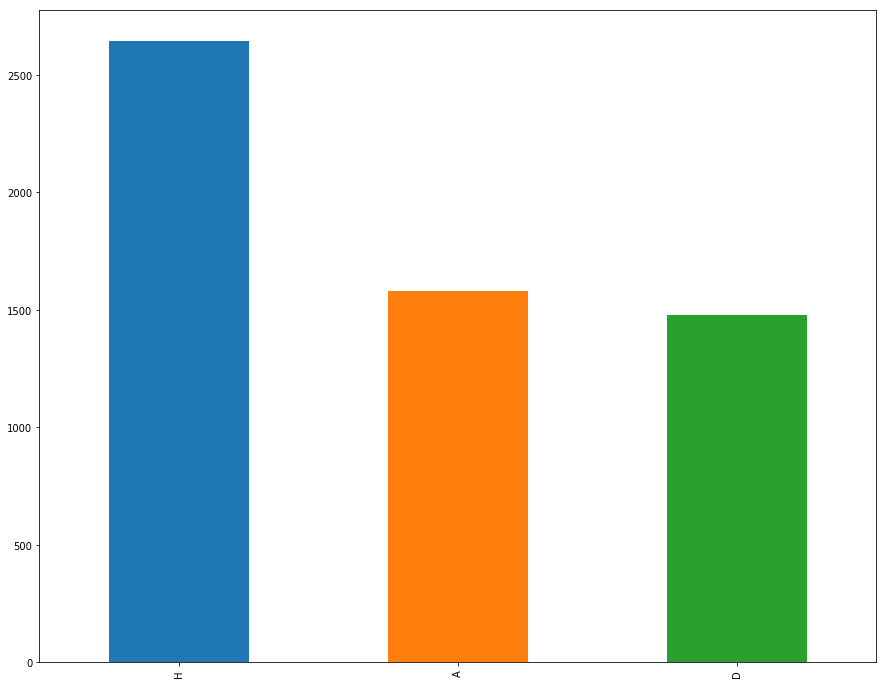

In [22]:
plt.figure(figsize=(15,12))
# plt.rc('xtick',labelsize=15)
# plt.rc('ytick',labelsize=15)
plt.plot(feature_table['FTR'].value_counts().plot(kind='bar'))
feature_table['FTR'].value_counts().plot(kind='bar')

In [25]:
df=feature_table.drop(["FTR"],axis=1)

In [23]:
feature_table.corr(method ='pearson')

,FTHG,FTAG,HS,AS,HST,AST,HTGD,ATGD,DiffPts,DiffFormPts,...,HY,AY,HR,AR,HAS,HDS,AAS,ADS,MP,Result
FTHG,1.000000,-0.046183,0.268729,-0.115781,0.395408,-0.089033,0.221733,-0.191900,0.271787,0.212666,...,-0.110826,0.005712,-0.083491,0.092555,0.273262,-0.223805,-0.179632,0.221686,0.179658,0.617726
FTAG,-0.046183,1.000000,-0.105423,0.294110,-0.090201,0.416087,-0.168078,0.187539,-0.244428,-0.210211,...,0.126182,-0.035954,0.124279,-0.062455,-0.170245,0.207866,0.250610,-0.203070,-0.142699,-0.625072
HS,0.268729,-0.105423,1.000000,-0.271028,0.751836,-0.209107,0.283821,-0.235193,0.344886,0.251856,...,-0.118002,0.001838,-0.114808,0.092873,0.324461,-0.275858,-0.281421,0.289125,0.231766,0.195219
AS,-0.115781,0.294110,-0.271028,1.000000,-0.215205,0.762707,-0.243436,0.247183,-0.330163,-0.255552,...,0.095575,-0.075712,0.102618,-0.105082,-0.277208,0.284454,0.292932,-0.263933,-0.219979,-0.230041
HST,0.395408,-0.090201,0.751836,-0.215205,1.000000,-0.068271,0.235887,-0.204738,0.292338,0.213873,...,-0.115648,-0.002028,-0.081769,0.074375,0.299232,-0.242693,-0.238722,0.250540,0.234448,0.277147
AST,-0.089033,0.416087,-0.209107,0.762707,-0.068271,1.000000,-0.203479,0.226973,-0.289768,-0.232432,...,0.089871,-0.045961,0.091992,-0.084699,-0.230785,0.247074,0.285435,-0.249407,-0.167572,-0.289102
HTGD,0.221733,-0.168078,0.283821,-0.243436,0.235887,-0.203479,1.000000,-0.020617,0.677286,0.454968,...,-0.087934,0.045266,-0.028019,0.016886,0.671004,-0.625607,-0.024198,0.016824,0.480569,0.230996
ATGD,-0.191900,0.187539,-0.235193,0.247183,-0.204738,0.226973,-0.020617,1.000000,-0.680062,-0.429742,...,0.118929,-0.002333,0.039216,-0.000632,-0.016121,0.019959,0.636940,-0.652480,-0.015496,-0.244759
DiffPts,0.271787,-0.244428,0.344886,-0.330163,0.292338,-0.289768,0.677286,-0.680062,1.000000,0.659934,...,-0.141079,0.034791,-0.047315,0.009173,0.462409,-0.419346,-0.448255,0.437497,0.325626,0.326685
DiffFormPts,0.212666,-0.210211,0.251856,-0.255552,0.213873,-0.232432,0.454968,-0.429742,0.659934,1.000000,...,-0.098423,0.038812,-0.046118,0.022248,0.357558,-0.332655,-0.336677,0.335741,0.262550,0.279077


In [24]:
feature_selection=feature_table.drop(["FTR","HomeTeam","AwayTeam"],axis=1)

In [25]:
names=list(feature_selection)
names.remove('FTHG')
names.remove('FTAG')
names.remove('Result')
feature_selection.to_csv(loc + "feature_selection.csv")
feature_selection.head()

,FTHG,FTAG,HS,AS,HST,AST,HTGD,ATGD,DiffPts,DiffFormPts,...,HY,AY,HR,AR,HAS,HDS,AAS,ADS,MP,Result
0,4,0,17,8,14,4,0,0,0,0,...,1,2,0,0,1.345865,1.338346,1.285714,1.368421,133,1
1,4,2,17,12,10,5,0,0,0,0,...,1,2,0,0,2.154386,0.800000,0.969298,1.653509,285,1
2,1,3,6,16,3,9,0,0,0,0,...,5,3,1,0,0.736842,1.210526,0.927632,1.434211,19,-1
3,2,2,6,13,4,6,0,0,0,0,...,1,1,0,0,0.964912,1.631579,1.013158,1.513158,57,0
4,2,0,17,12,8,6,0,0,0,0,...,1,3,0,0,1.539474,1.302632,1.073684,1.354386,76,1


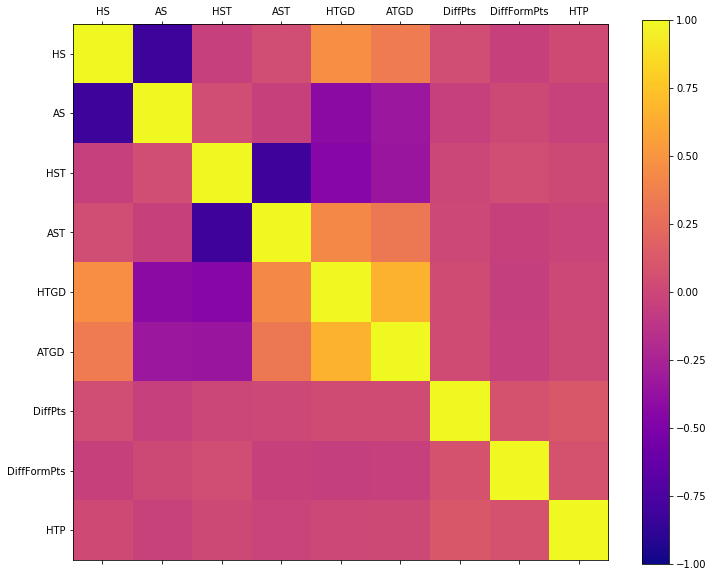

In [26]:
# Correction Matrix Plot
import matplotlib.pyplot as plt
import numpy

data = feature_table[['HAS','HDS','AAS','ADS','DiffPts','DiffFormPts','AY','HR','AR']]
correlations = data.corr()
# plot correlation matrix
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1, cmap='plasma')
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [27]:
plt.figure(figsize=(40,15))

rs = np.random.RandomState(0)
data = feature_table[['HAS','HDS','AAS','ADS','DiffPts','DiffFormPts','AY','HR','AR']]
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm' ).set_precision(2)

,HAS,HDS,AAS,ADS,DiffPts,DiffFormPts,AY,HR,AR
HAS,1,-0.82,-0.045,0.041,0.46,0.36,0.045,-0.036,0.03
HDS,-0.82,1,0.041,-0.039,-0.42,-0.33,-0.045,0.02,-0.024
AAS,-0.045,0.041,1,-0.81,-0.45,-0.34,0.00084,0.044,0.017
ADS,0.041,-0.039,-0.81,1,0.44,0.34,0.013,-0.037,-0.015
DiffPts,0.46,-0.42,-0.45,0.44,1,0.66,0.035,-0.047,0.0092
DiffFormPts,0.36,-0.33,-0.34,0.34,0.66,1,0.039,-0.046,0.022
AY,0.045,-0.045,0.00084,0.013,0.035,0.039,1,0.084,0.12
HR,-0.036,0.02,0.044,-0.037,-0.047,-0.046,0.084,1,0.081
AR,0.03,-0.024,0.017,-0.015,0.0092,0.022,0.12,0.081,1


<Figure size 2880x1080 with 0 Axes>

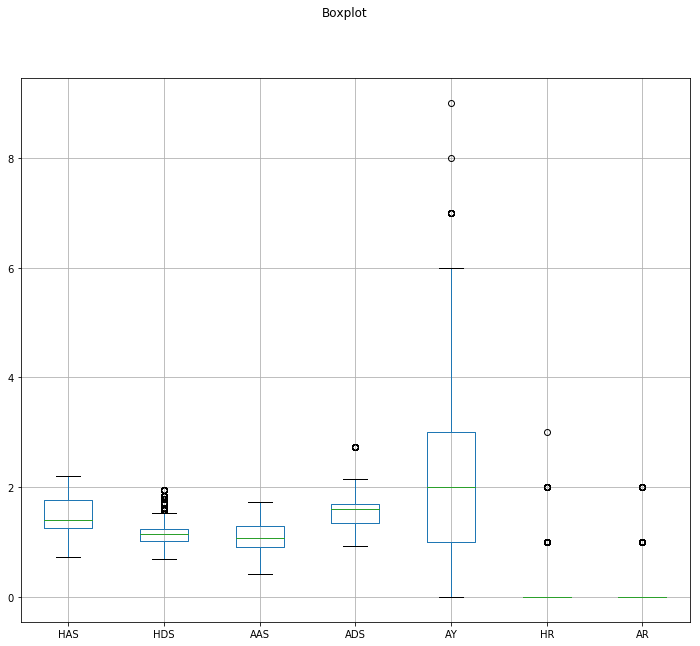

In [28]:
import seaborn as sns
#sns.boxplot(x=feature_table['HAS'])
#sns.boxplot(x=feature_table['HDS'])
# sns.boxplot(x=feature_table['AAS'])
# sns.boxplot(x=feature_table['ADS'])
# sns.boxplot(x=feature_table['AY'])
# sns.boxplot(x=feature_table['HR'])
# sns.boxplot(x=feature_table['AR'])

data = feature_table[['HAS','HDS','AAS','ADS','AY','HR','AR']]
bp = data.boxplot(column=['HAS','HDS','AAS','ADS','AY','HR','AR'],figsize=(12,10))
[ax_tmp.set_xlabel('') for ax_tmp in np.asarray(bp).reshape(-1)]
fig = np.asarray(bp).reshape(-1)[0].get_figure()
fig.suptitle('Boxplot')
plt.show()

In [29]:
# Feature Extraction with RFE
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

# Recursive Feature Elimination with Cross Validation

In [32]:
array = feature_selection.values
#names = list(feature_selection.columns.values)
X = array[:,2:23]
Y = array[:,23]
Y = Y.astype('int')
# feature extraction
model = LogisticRegression()
rfecv = RFECV(model, 6)
fit = rfecv.fit(X, Y) 
names=list(feature_selection)
names.remove('FTHG')
names.remove('FTAG')
names.remove('Result')
print(fit.n_features_)
print(fit.support_)
print(fit.ranking_)


fmt = '{:<8}{:<20}{}'

print(' ')
print(fmt.format('', 'Ranking', 'Feature Name'))
for i, (name, grade) in enumerate(zip(rfecv.ranking_, names)):
    print(fmt.format(i, name, grade))

9
[False  True False  True False  True False False False False False False
 False False False  True  True  True  True  True  True]
[2 1 3 1 2 1 2 3 2 3 2 3 2 3 3 1 1 1 1 1 1]
 
        Ranking             Feature Name
0       2                   HS
1       1                   AS
2       3                   HST
3       1                   AST
4       2                   HTGD
5       1                   ATGD
6       2                   DiffPts
7       3                   DiffFormPts
8       2                   HTP
9       3                   ATP
10      2                   HC
11      3                   AC
12      2                   HF
13      3                   AF
14      3                   HY
15      1                   AY
16      1                   HR
17      1                   AR
18      1                   HAS
19      1                   HDS
20      1                   AAS


# Principal Component Analysis

In [33]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(feature_selection)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [34]:
scaled_data=scaler.fit_transform(feature_selection)
scaled_data

array([[ 1.90771742, -1.00856547,  0.7142845 , ..., -0.54863836,
        -0.90042237,  0.96788064],
       [ 1.90771742,  0.78150869,  0.7142845 , ...,  0.44306057,
         0.93094517,  0.96788064],
       [-0.40573325,  1.67654578, -1.46083149, ..., -0.31978476,
        -2.27394803, -1.41164046],
       ...,
       [ 0.36541697,  0.78150869,  1.50523577, ...,  0.76345561,
        -2.04502709, -0.22187991],
       [-0.40573325, -0.11352839, -0.07666677, ..., -1.1467091 ,
        -0.44258049, -0.22187991],
       [ 1.1365672 , -0.11352839, -0.27440458, ...,  0.73294179,
         0.93094517,  0.96788064]])

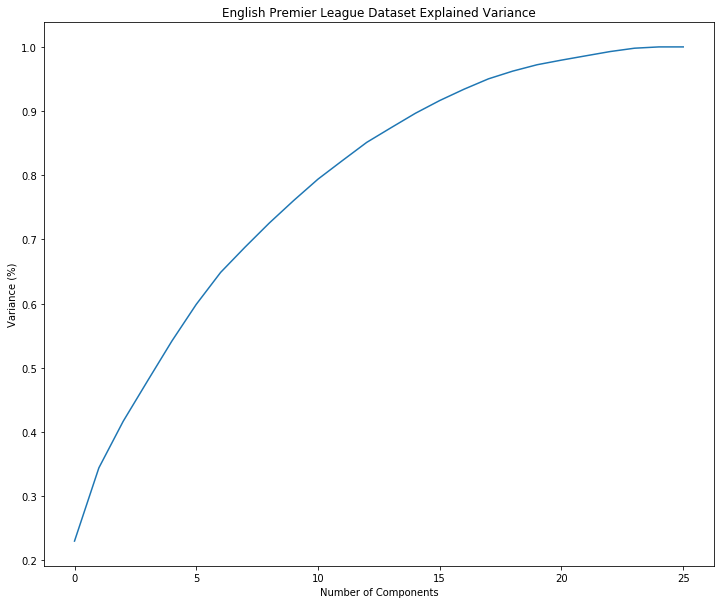

In [35]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#Fitting the PCA algorithm with our Data
pca = PCA().fit(scaled_data)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize=(12,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('English Premier League Dataset Explained Variance')
plt.show()

In [36]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


array = feature_selection.values
X = array[:,2:23]
#Y = array[:,23]
# feature extraction
pca = PCA(n_components=2)
fit = pca.fit(X)
# summarize components
print('Explained Variance Ratio : ')
print(fit.explained_variance_ratio_)
print('\n')
print('Explained Variance : ')
print(fit.explained_variance_)
print('\n')
print(fit.components_)
print('\n')
print(StandardScaler().fit_transform(X))

Explained Variance Ratio : 
[0.42663553 0.3651967 ]


Explained Variance : 
[589.92494204 504.97117371]


[[ 6.57722929e-03 -3.18841655e-03  4.22203645e-03 -3.01590034e-04
   2.35063027e-01  2.16417393e-01  1.19900898e-02  5.37224599e-03
   6.75750796e-01  6.63760706e-01  2.05349805e-03 -2.97038163e-03
  -1.45601780e-02 -1.37032835e-02 -1.63027021e-03 -2.05349752e-03
  -9.96362595e-05 -1.58186725e-04  3.91817184e-03 -2.28330330e-03
   2.68549205e-03]
 [-8.63525952e-02  7.06364120e-02 -4.91982714e-02  4.07454494e-02
  -4.43100203e-01  4.52158914e-01 -6.12166276e-01 -1.32086272e-01
  -2.91630791e-01  3.20535486e-01 -3.33801005e-02  2.96691728e-02
   2.00552301e-02 -1.13822474e-02  7.63515662e-03 -2.11286441e-03
   6.16543541e-04 -2.18628164e-04 -7.54311018e-03  4.55392558e-03
   5.88724807e-03]]


[[ 0.7142845  -0.53479825  2.12489195 ... -0.50874129  0.91070075
   0.56740064]
 [ 0.7142845   0.37774479  0.94866683 ...  1.77292059 -1.40732889
  -0.56265664]
 [-1.46083149  1.29028784 -1.10

# Extra Trees Classifier

In [37]:
from sklearn.ensemble import ExtraTreesClassifier
# load data
array = feature_selection.values
X = array[:,2:23]
Y = array[:,23]
Y = Y.astype('int')
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

names=list(feature_selection)
names.remove('FTHG')
names.remove('FTAG')
names.remove('Result')

print(' ')
print('Sorted Feature Importance Descending')
sorted(list(zip(model.feature_importances_, names)),reverse = True)

[0.03881531 0.03328931 0.03279772 0.02884074 0.0352339  0.07109393
 0.03608076 0.03421411 0.03033702 0.03741588 0.02768222 0.02985581
 0.03291913 0.032454   0.02519468 0.02915778 0.00739011 0.00982341
 0.03051154 0.0307804  0.36611226]
 
Sorted Feature Importance Descending


[(0.3661122583012806, 'AAS'),
 (0.07109392572617078, 'ATGD'),
 (0.03881531276478584, 'HS'),
 (0.03741588128245712, 'ATP'),
 (0.03608076260272898, 'DiffPts'),
 (0.03523390309193885, 'HTGD'),
 (0.034214105091546695, 'DiffFormPts'),
 (0.03328930874591896, 'AS'),
 (0.03291913480581801, 'HF'),
 (0.03279771708938969, 'HST'),
 (0.03245399622235241, 'AF'),
 (0.030780399985010587, 'HDS'),
 (0.03051153755354724, 'HAS'),
 (0.03033701900610376, 'HTP'),
 (0.02985580506093491, 'AC'),
 (0.029157779031677645, 'AY'),
 (0.028840738067101752, 'AST'),
 (0.02768221928045873, 'HC'),
 (0.025194678781546315, 'HY'),
 (0.009823411852958402, 'AR'),
 (0.007390105656272801, 'HR')]

# Random Forest Classifier

In [38]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestClassifier
# load data
array = feature_selection.values
X = array[:,2:23]
Y = array[:,23]
Y = Y.astype('int')
# feature extraction
model = RandomForestClassifier()
model.fit(X, Y)
print(model.feature_importances_)
importance=model.feature_importances_
names=list(feature_selection)
names.remove('FTHG')
names.remove('FTAG')
names.remove('Result')

print(' ')
print('Sorted Feature Importance Descending')
sorted(list(zip(importance, names)),reverse = True)

[0.02824415 0.02972474 0.02868871 0.01792476 0.02927718 0.08370673
 0.04128774 0.02856428 0.03436002 0.04024702 0.02529489 0.02114513
 0.03512204 0.02421448 0.01745474 0.01849915 0.00175196 0.00307883
 0.02358465 0.0262447  0.4415841 ]
 
Sorted Feature Importance Descending


[(0.44158409708697277, 'AAS'),
 (0.08370673005302351, 'ATGD'),
 (0.0412877370535647, 'DiffPts'),
 (0.04024702443666224, 'ATP'),
 (0.03512204362388187, 'HF'),
 (0.03436001713894561, 'HTP'),
 (0.029724742608435117, 'AS'),
 (0.029277177840921938, 'HTGD'),
 (0.028688712098408942, 'HST'),
 (0.028564278164942457, 'DiffFormPts'),
 (0.0282441534527951, 'HS'),
 (0.026244697027712944, 'HDS'),
 (0.025294891378534762, 'HC'),
 (0.024214476626481893, 'AF'),
 (0.023584652078075703, 'HAS'),
 (0.021145132032309596, 'AC'),
 (0.018499153080959903, 'AY'),
 (0.017924755365581642, 'AST'),
 (0.017454744012901573, 'HY'),
 (0.0030788287893763018, 'AR'),
 (0.00175195604951136, 'HR')]

In [39]:
feature_table.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,HTGD,...,HY,AY,HR,AR,HAS,HDS,AAS,ADS,MP,Result
0,Charlton,Man City,4,0,H,17,8,14,4,0,...,1,2,0,0,1.345865,1.338346,1.285714,1.368421,133,1
1,Chelsea,West Ham,4,2,H,17,12,10,5,0,...,1,2,0,0,2.154386,0.800000,0.969298,1.653509,285,1
2,Coventry,Middlesbrough,1,3,A,6,16,3,9,0,...,5,3,1,0,0.736842,1.210526,0.927632,1.434211,19,-1
3,Derby,Southampton,2,2,D,6,13,4,6,0,...,1,1,0,0,0.964912,1.631579,1.013158,1.513158,57,0
4,Leeds,Everton,2,0,H,17,12,8,6,0,...,1,3,0,0,1.539474,1.302632,1.073684,1.354386,76,1


In [26]:
df.describe()
df.to_csv(loc + "df.csv")

In [27]:
# Feature Extraction with RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


In [40]:
#Two sets of training sets - adding features.
#X_train = feature_table[['FTHG','FTAG','HTAG','HTHG','HR','AR','B365H','B365D','HDS','ADS']]
X_train = feature_table[['HAS','HDS','AAS','ADS','DiffPts','DiffFormPts','AY','HR','AR']]
#X_train_2 = feature_table[['HR','AR','B365H','B365D','HDS','ADS']]
y_train = feature_table['Result']
display(X_train.head())
#display(X_train_2.tail())

,HAS,HDS,AAS,ADS,DiffPts,DiffFormPts,AY,HR,AR
0,1.345865,1.338346,1.285714,1.368421,0,0,2,0,0
1,2.154386,0.800000,0.969298,1.653509,0,0,2,0,0
2,0.736842,1.210526,0.927632,1.434211,0,0,3,1,0
3,0.964912,1.631579,1.013158,1.513158,0,0,1,0,0
4,1.539474,1.302632,1.073684,1.354386,0,0,3,0,0


In [30]:
feature_table.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,HTGD,...,HY,AY,HR,AR,HAS,HDS,AAS,ADS,MP,Result
0,Charlton,Man City,4,0,H,17,8,14,4,0,...,1,2,0,0,1.345865,1.338346,1.285714,1.368421,133,1
1,Chelsea,West Ham,4,2,H,17,12,10,5,0,...,1,2,0,0,2.154386,0.800000,0.969298,1.653509,285,1
2,Coventry,Middlesbrough,1,3,A,6,16,3,9,0,...,5,3,1,0,0.736842,1.210526,0.927632,1.434211,19,-1
3,Derby,Southampton,2,2,D,6,13,4,6,0,...,1,1,0,0,0.964912,1.631579,1.013158,1.513158,57,0
4,Leeds,Everton,2,0,H,17,12,8,6,0,...,1,3,0,0,1.539474,1.302632,1.073684,1.354386,76,1


In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline  
from sklearn.svm import SVC
from sklearn import linear_model

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, 
                                                    test_size = 30,
                                                    random_state = 2,
                                                    stratify = y_train)

In [43]:
from time import time 
# F1 score (also F-score or F-measure) is a measure of a test's accuracy. 
#It considers both the precision p and the recall r of the test to compute 
#the score: p is the number of correct positive results divided by the number of 
#all positive results, and r is the number of correct positive results divided by 
#the number of positive results that should have been returned. The F1 score can be 
#interpreted as a weighted average of the precision and recall, where an F1 score 
#reaches its best value at 1 and worst at 0.
from sklearn.metrics import f1_score

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
   # print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    
    end = time()
    # Print and return results
  #  print "Made predictions in {:.4f} seconds.".format(end - start)
    
    return f1_score(target, y_pred, pos_label='H',average='micro'), sum(target == y_pred) / float(len(y_pred))


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    #print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    f1, acc = predict_labels(clf, X_train, y_train)
    print(f1, acc)
    print("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
    
    f1, acc = predict_labels(clf, X_test, y_test)
    print("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))


In [44]:
import xgboost as xgb
# Initialize the three models (XGBoost is initialized later)
clf_A = LogisticRegression(random_state = 42)
clf_B = SVC(random_state = 912, kernel='rbf')
#Boosting refers to this general problem of producing a very accurate prediction rule 
#by combining rough and moderately inaccurate rules-of-thumb
clf_C = xgb.XGBClassifier(seed = 82)

train_predict(clf_A, X_train, y_train, X_test, y_test)
print('')
train_predict(clf_B, X_train, y_train, X_test, y_test)
print('')
train_predict(clf_C, X_train, y_train, X_test, y_test)
print('')

0.546031746031746 0.546031746031746
F1 score and accuracy score for training set: 0.5460 , 0.5460.
F1 score and accuracy score for test set: 0.6000 , 0.6000.

0.5604938271604938 0.5604938271604938
F1 score and accuracy score for training set: 0.5605 , 0.5605.
F1 score and accuracy score for test set: 0.6333 , 0.6333.

0.5656084656084656 0.5656084656084656
F1 score and accuracy score for training set: 0.5656 , 0.5656.
F1 score and accuracy score for test set: 0.7000 , 0.7000.



In [45]:
xg_reg = xgb.XGBClassifier(objective='binary:logistic',seed=82, 
                               alpha = 10, learning_rate = 0.1,
                                n_estimators=100,
                          )

train_predict(xg_reg, X_train, y_train, X_test, y_test)
print('')

0.5656084656084656 0.5656084656084656
F1 score and accuracy score for training set: 0.5656 , 0.5656.
F1 score and accuracy score for test set: 0.7000 , 0.7000.



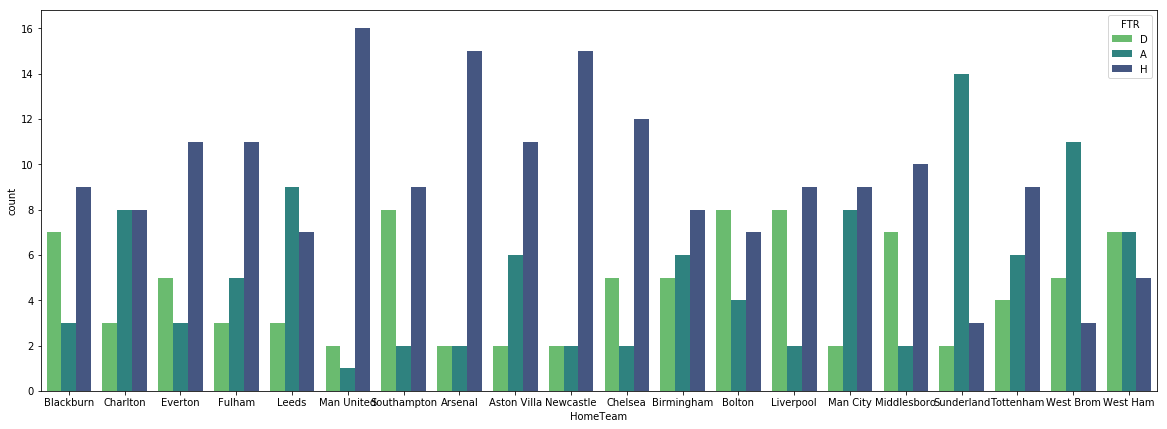

In [46]:
plt.figure(figsize=(20,7))
#sns.countplot(x='HomeTeam', hue='Result', data=feature_table, palette='RdBu_r')
sns.countplot(x='HomeTeam', hue='FTR', data=raw_data_3, palette='viridis_r')

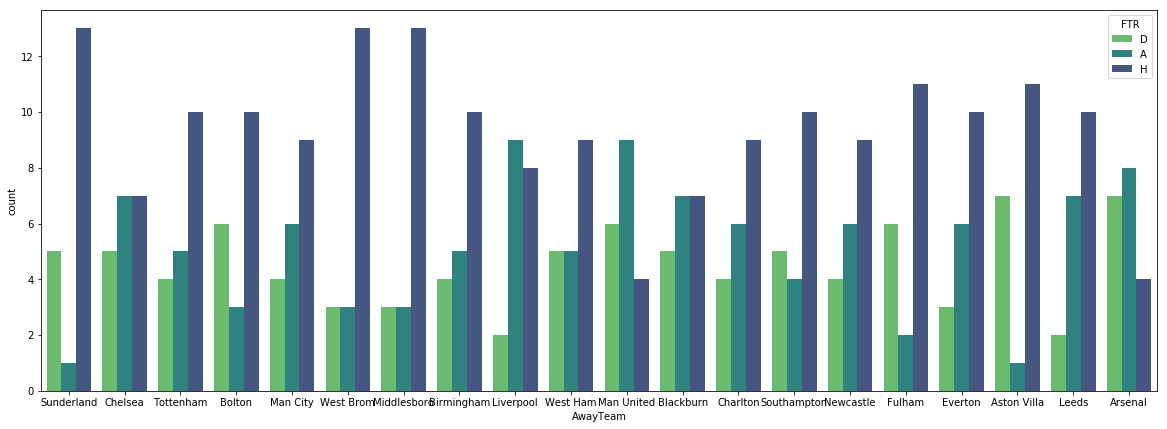

In [47]:
plt.figure(figsize=(20,7))
#sns.countplot(x='HomeTeam', hue='Result', data=feature_table, palette='RdBu_r')
sns.countplot(x='AwayTeam', hue='FTR', data=raw_data_3, palette='viridis_r')

In [50]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [51]:
logreg.score(X_train,y_train)

0.546031746031746

In [52]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))


print("Training set score for Logistic Regression: %f" % logreg.score(X_train,y_train))
print("Testing set score for Logistic Regression: %f" % logreg.score(X_test,y_test))

[[ 4  0  4]
 [ 3  1  4]
 [ 1  0 13]]


              precision    recall  f1-score   support

          -1       0.50      0.50      0.50         8
           0       1.00      0.12      0.22         8
           1       0.62      0.93      0.74        14

   micro avg       0.60      0.60      0.60        30
   macro avg       0.71      0.52      0.49        30
weighted avg       0.69      0.60      0.54        30

Training set score for Logistic Regression: 0.546032
Testing set score for Logistic Regression: 0.600000


In [48]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn.svm import SVC
from sklearn import linear_model

In [49]:
#Libraries to Build Ensemble Model : Random Forest Classifier 
# Create the parameter grid based on the results of random search 
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [37]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3,random_state=109) # 70% training and 30% test

In [38]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV

# Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.001, 0.0001], 'C': [1, 10, 100, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [39]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search  
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
y_pred = final_model.predict(X_test)

Best score for training data: 0.5364071554547745 

Best C: 100 

Best Kernel: linear 

Best Gamma: auto 



In [40]:
from sklearn.metrics import confusion_matrix,classification_report

# Making the Confusion Matrix
#print(pd.crosstab(Y_test_label, Y_pred_label, rownames=['Actual Activity'], colnames=['Predicted Activity']))
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

print("Training set score for SVM: %f" % final_model.score(X_train, y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test, y_test ))

svm_model.score

[[196  16 273]
 [ 99   7 324]
 [104  15 667]]


             precision    recall  f1-score   support

         -1       0.49      0.40      0.44       485
          0       0.18      0.02      0.03       430
          1       0.53      0.85      0.65       786

avg / total       0.43      0.51      0.43      1701

Training set score for SVM: 0.529604
Testing  set score for SVM: 0.511464


<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.001, 0.0001], 'C': [1, 10, 100, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)>